In [2]:
!pip install xarray
!pip install cdsapi
!pip install geopandas

You should consider upgrading via the '/Users/samihaddouti/.pyenv/versions/3.8.7/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/samihaddouti/.pyenv/versions/3.8.7/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/samihaddouti/.pyenv/versions/3.8.7/bin/python3.8 -m pip install --upgrade pip' command.


# Extract data

In [18]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
        'reanalysis-era5-land',
        {
            'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
            'evaporation_from_bare_soil', 'leaf_area_index_high_vegetation', 'leaf_area_index_low_vegetation',
            'skin_reservoir_content', 'skin_temperature', 'total_evaporation', 'total_precipitation',
        ],
            'year': ['2020', '2021', '2022'],
            'month': ['5', '6', '7', '8', '9' '10'],
            'day': [
                '01', '02', '03',
                '04', '05', '06',
                '07', '08', '09',
                '10', '11', '12',
                '13', '14', '15',
                '16', '17', '18',
                '19', '20', '21',
                '22', '23', '24',
                '25', '26', '27',
                '28', '29', '30',
                '31',
            ],
            'time': [
                '17:00'
            ],
            'format': 'netcdf',
            'area': [
                43.82, -9.5458, 35.9664, 3.4212,
            ],
        },
        'ERA5_spain.nc')
    

# Höchtemperatur im Sommer wird ab 17 Uhr gemessen

2023-06-16 21:19:49,526 INFO Welcome to the CDS
2023-06-16 21:19:49,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2023-06-16 21:19:49,603 INFO Request is queued
2023-06-16 21:19:50,670 INFO Request is running
2023-06-16 21:30:08,778 INFO Request is completed
2023-06-16 21:30:08,780 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/adaptor.mars.internal-1686943758.1449053-1076-14-b20aef7c-e15e-4adb-9eed-42e92e782724.nc to ERA5_spain.nc (72.3M)
2023-06-16 21:30:21,240 INFO Download rate 5.8M/s   


Result(content_length=75798352,content_type=application/x-netcdf,location=https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/adaptor.mars.internal-1686943758.1449053-1076-14-b20aef7c-e15e-4adb-9eed-42e92e782724.nc)

In [3]:
import xarray as xr

ds = xr.open_dataset('ERA5_spain.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 130, latitude: 79, time: 369)
Coordinates:
  * longitude  (longitude) float32 -9.546 -9.446 -9.346 ... 3.155 3.255 3.355
  * latitude   (latitude) float32 43.77 43.67 43.57 43.47 ... 36.17 36.07 35.97
  * time       (time) datetime64[ns] 2020-05-01T17:00:00 ... 2022-08-31T17:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    evabs      (time, latitude, longitude) float32 ...
    lai_hv     (time, latitude, longitude) float32 ...
    lai_lv     (time, latitude, longitude) float32 ...
    src        (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    e          (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-06-16 19:29:27 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
df = ds.to_dataframe()
df.dropna(inplace=True)
df

u10       v10         t2m  \
longitude latitude  time                                                  
-9.445992 38.867001 2020-05-01 17:00:00  3.112254  1.182039  290.677887   
                    2020-05-02 17:00:00  2.924212 -1.948506  291.351532   
                    2020-05-03 17:00:00  1.525630  4.767544  296.054382   
                    2020-05-04 17:00:00  4.789202  5.436440  291.236786   
                    2020-05-05 17:00:00  2.901390  3.720486  291.236115   
...                                           ...       ...         ...   
 3.355000 35.966000 2022-08-27 17:00:00 -0.048780 -3.161503  303.685974   
                    2022-08-28 17:00:00  0.418914 -2.303011  306.447021   
                    2022-08-29 17:00:00  1.914250 -1.568631  304.064423   
                    2022-08-30 17:00:00 -1.113386 -2.211128  306.124298   
                    2022-08-31 17:00:00  0.925181 -2.132273  303.853729   

                                            evabs    lai_hv    lai_lv  \
longitude latitude  time                                                
-9.445992 38.867001 2020-05-01 17:00:00 -0.000911  2.500041  3.104129   
                    2020-05-02 17:00:00 -0.001068  2.500041  3.102900   
                    2020-05-03 17:00:00 -0.001309  2.500041  3.101535   
                    2020-05-04 17:00:00 -0.000754  2.500041  3.100238   
                    2020-05-05 17:00:00 -0.000800  2.500041  3.099009   
...                                           ...       ...       ...   
 3.355000 35.966000 2022-08-27 17:00:00 -0.000258  2.048205  1.055939   
                    2022-08-28 17:00:00 -0.000250  2.047209  1.055529   
                    2022-08-29 17:00:00 -0.000191  2.046295  1.055325   
                    2022-08-30 17:00:00 -0.000248  2.045299  1.055052   
                    2022-08-31 17:00:00 -0.000196  2.044303  1.054915   

                                                  src         skt         e  \
longitude latitude  time                                                      
-9.445992 38.867001 2020-05-01 17:00:00  2.321904e-07  297.625061 -0.002715   
                    2020-05-02 17:00:00  0.000000e+00  299.052216 -0.002949   
                    2020-05-03 17:00:00  0.000000e+00  300.459290 -0.003603   
                    2020-05-04 17:00:00  2.729939e-08  296.058990 -0.002481   
                    2020-05-05 17:00:00  4.466681e-06  297.160065 -0.002528   
...                                               ...         ...       ...   
 3.355000 35.966000 2022-08-27 17:00:00  5.462789e-08  307.000732 -0.000334   
                    2022-08-28 17:00:00  0.000000e+00  309.088867 -0.000321   
                    2022-08-29 17:00:00  3.703128e-05  304.762421 -0.000495   
                    2022-08-30 17:00:00  0.000000e+00  308.773224 -0.000668   
                    2022-08-31 17:00:00  0.000000e+00  306.196808 -0.000519   

                                               tp  
longitude latitude  time                           
-9.445992 38.867001 2020-05-01 17:00:00  0.000331  
                    2020-05-02 17:00:00  0.000043  
                    2020-05-03 17:00:00  0.000001  
                    2020-05-04 17:00:00  0.000775  
                    2020-05-05 17:00:00  0.000808  
...                                           ...  
 3.355000 35.966000 2022-08-27 17:00:00  0.000008  
                    2022-08-28 17:00:00  0.000017  
                    2022-08-29 17:00:00  0.001151  
                    2022-08-30 17:00:00  0.000069  
                    2022-08-31 17:00:00  0.000313  

[2563074 rows x 10 columns]

In [5]:
df.to_csv('ERA5_spain_df.csv')

# Process data

In [6]:
import json

with open('iberiaLow.json') as f:
    geojson_data = json.load(f)

In [7]:
import pandas as pd

df = pd.read_csv('ERA5_spain_df.csv')
df

,longitude,latitude,time,u10,v10,t2m,evabs,lai_hv,lai_lv,src,skt,e,tp
0,-9.445992,38.867001,2020-05-01 17:00:00,3.112254,1.182039,290.67790,-0.000911,2.500040,3.104129,2.321904e-07,297.62506,-0.002715,0.000331
1,-9.445992,38.867001,2020-05-02 17:00:00,2.924212,-1.948506,291.35153,-0.001068,2.500040,3.102900,0.000000e+00,299.05222,-0.002949,0.000043
2,-9.445992,38.867001,2020-05-03 17:00:00,1.525630,4.767544,296.05438,-0.001309,2.500040,3.101535,0.000000e+00,300.45930,-0.003603,0.000001
3,-9.445992,38.867001,2020-05-04 17:00:00,4.789202,5.436440,291.23680,-0.000754,2.500040,3.100238,2.729939e-08,296.05900,-0.002481,0.000775
4,-9.445992,38.867001,2020-05-05 17:00:00,2.901390,3.720486,291.23610,-0.000800,2.500040,3.099009,4.466681e-06,297.16006,-0.002528,0.000808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563069,3.355000,35.966000,2022-08-27 17:00:00,-0.048780,-3.161503,303.68597,-0.000258,2.048205,1.055939,5.462789e-08,307.00073,-0.000334,0.000008
2563070,3.355000,35.966000,2022-08-28 17:00:00,0.418915,-2.303011,306.44702,-0.000250,2.047209,1.055530,0.000000e+00,309.08887,-0.000321,0.000017
2563071,3.355000,35.966000,2022-08-29 17:00:00,1.914250,-1.568631,304.06442,-0.000191,2.046295,1.055325,3.703128e-05,304.76242,-0.000495,0.001151
2563072,3.355000,35.966000,2022-08-30 17:00:00,-1.113386,-2.211128,306.12430,-0.000248,2.045299,1.055052,0.000000e+00,308.77322,-0.000668,0.000069


In [40]:
from shapely.geometry import shape, Point

# construct point based on lon/lat returned by geocoder
point = Point(43.766998291015625, -9.545999526977539)

# check each polygon to see if it contains the point
for feature in geojson_data['features']:
    polygon = shape(feature['geometry'])
    if polygon.contains(point):
        print('Found containing polygon:', feature)

In [1]:
df[~df.isnull().any(axis=1)]

NameError: name 'df' is not defined

In [84]:
df[df.isnull().any(axis=1)]

u10       v10         t2m  \
longitude latitude time                                                  
-9.245976 38.667   2020-05-01 17:00:00  2.894639  0.775078  291.572296   
                   2020-05-02 17:00:00  2.896568 -1.581316  292.956482   
                   2020-05-03 17:00:00  1.292586  3.788713  297.772736   
                   2020-05-04 17:00:00  4.605339  4.453153  291.842010   
                   2020-05-05 17:00:00  2.897211  3.083474  292.217773   
...                                          ...       ...         ...   
 3.355000 35.966   2022-08-27 17:00:00 -0.048780 -3.161503  303.685974   
                   2022-08-28 17:00:00  0.418914 -2.303011  306.447021   
                   2022-08-29 17:00:00  1.914250 -1.568631  304.064423   
                   2022-08-30 17:00:00 -1.113386 -2.211128  306.124298   
                   2022-08-31 17:00:00  0.925181 -2.132273  303.853729   

                                           evabs    lai_hv    lai_lv  \
longitude latitude time                                                
-9.245976 38.667   2020-05-01 17:00:00 -0.001518  1.846780  2.274409   
                   2020-05-02 17:00:00 -0.001809  1.844871  2.273590   
                   2020-05-03 17:00:00 -0.002180  1.842795  2.272566   
                   2020-05-04 17:00:00 -0.001250  1.840719  2.271883   
                   2020-05-05 17:00:00 -0.001195  1.838727  2.270996   
...                                          ...       ...       ...   
 3.355000 35.966   2022-08-27 17:00:00 -0.000258  2.048205  1.055939   
                   2022-08-28 17:00:00 -0.000250  2.047209  1.055529   
                   2022-08-29 17:00:00 -0.000191  2.046295  1.055325   
                   2022-08-30 17:00:00 -0.000248  2.045299  1.055052   
                   2022-08-31 17:00:00 -0.000196  2.044303  1.054915   

                                                 src         skt         e  \
longitude latitude time                                                      
-9.245976 38.667   2020-05-01 17:00:00  1.364970e-08  294.578033 -0.002295   
                   2020-05-02 17:00:00  0.000000e+00  296.071045 -0.002447   
                   2020-05-03 17:00:00  0.000000e+00  298.684387 -0.003047   
                   2020-05-04 17:00:00  3.551540e-07  293.907410 -0.002472   
                   2020-05-05 17:00:00  2.339896e-05  294.597290 -0.002633   
...                                              ...         ...       ...   
 3.355000 35.966   2022-08-27 17:00:00  5.462789e-08  307.000732 -0.000334   
                   2022-08-28 17:00:00  0.000000e+00  309.088867 -0.000321   
                   2022-08-29 17:00:00  3.703128e-05  304.762421 -0.000495   
                   2022-08-30 17:00:00  0.000000e+00  308.773224 -0.000668   
                   2022-08-31 17:00:00  0.000000e+00  306.196808 -0.000519   

                                              tp Region Country  
longitude latitude time                                          
-9.245976 38.667   2020-05-01 17:00:00  0.000156    NaN     NaN  
                   2020-05-02 17:00:00  0.000008    NaN     NaN  
                   2020-05-03 17:00:00  0.000001    NaN     NaN  
                   2020-05-04 17:00:00  0.000569    NaN     NaN  
                   2020-05-05 17:00:00  0.001241    NaN     NaN  
...                                          ...    ...     ...  
 3.355000 35.966   2022-08-27 17:00:00  0.000008    NaN     NaN  
                   2022-08-28 17:00:00  0.000017    NaN     NaN  
                   2022-08-29 17:00:00  0.001151    NaN     NaN  
                   2022-08-30 17:00:00  0.000069    NaN     NaN  
                   2022-08-31 17:00:00  0.000313    NaN     NaN  

[525995 rows x 12 columns]

In [37]:
import multiprocessing
import threading
from math import nan

# parallelization batching prep
thread_count = multiprocessing.cpu_count() // 2
articles_queued = len(df)
step_size = articles_queued // thread_count

# slicing indices
start = list(range(0, articles_queued, step_size))
end = list(range(step_size, articles_queued, step_size))
end.append(articles_queued)

# csv file to write to
csv_name = list(range(1, thread_count+1))

headers = ['longitude', 'latitude', 'time', 'u10', 'v10', 't2m',	'evabs', 'lai_hv',	'lai_lv', 'src', 'skt', 'e', 'tp', 'region', 'country']
for i in range(thread_count):
    # Write the headers to the CSV file
    df_subset = df[start[i]: end[i]]
    df_subset.to_csv(f"df_split_{csv_name[i]}.csv", )

In [38]:
from shapely.geometry import shape, Point

def map_geojson_features(csv_name):

   df_subset = pd.read_csv(f"df_split_{csv_name}.csv")

   # Iterate over the rows in your dataframe
   for index, row in df_subset.iterrows():
      #if row.isna().any():
      region = nan
      country = nan
      point = Point(row['longitude'], row['latitude'])

      # check each polygon to see if it contains the point
      for feature in geojson_data['features']:
         polygon = shape(feature['geometry'])
         if polygon.contains(point):
            region = feature['properties']['name']
            country = feature['properties']['CNTRY']


      df_subset.loc[index, 'Region'] = region
      df_subset.loc[index, 'Country'] = country

      df_subset.to_csv(f"df_split_{csv_name}.csv")


In [39]:
thread_list = []
for i in range(thread_count):
    thread_list.append(threading.Thread(target=map_geojson_features, args=([csv_name[i]])))

for thread in thread_list:
    thread.start()

for thread in thread_list:
    thread.join()

In [ ]:
df

,,,u10,v10,t2m,evabs,lai_hv,lai_lv,src,skt,e,tp,Region,Country
longitude,latitude,time,,,,,,,,,,,,
-9.445992,38.867001,2020-05-01 17:00:00,3.112254,1.182039,290.677887,-0.000911,2.500041,3.104129,2.321904e-07,297.625061,-0.002715,0.000331,Lisboa,Portugal


In [ ]:
df.to_csv('ERA5_spain_df.csv')

In [ ]:
# Remove longitude, latitude
# Reduce time to date

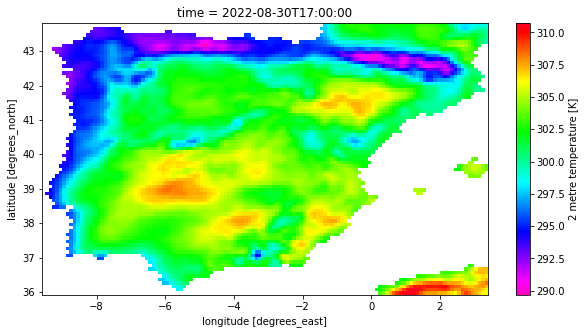

In [21]:
import datetime

mytime = datetime.datetime(2022, 8, 31)
ds.sel(time = mytime,  method='nearest').t2m.plot(cmap='gist_rainbow_r',figsize=(10,5))